In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'
!kaggle datasets download -d thedevastator/cancer-patients-and-air-pollution-a-new-link
!unzip \*.zip && rm *.zip

  0% 0.00/7.36k [00:00<?, ?B/s]
100% 7.36k/7.36k [00:00<00:00, 15.8MB/s]
Archive:  cancer-patients-and-air-pollution-a-new-link.zip
  inflating: cancer patient data sets.csv  


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load data
data = pd.read_csv('/content/cancer patient data sets.csv')

# Assuming 'Level' is the name of your target variable
X = data.drop(['index', 'Patient Id', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'Level'], axis=1)
y = data['Level']

# Encode categorical variables (Gender)
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate multiple KNN models with different hyperparameters
knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=7)

# Create a voting classifier ensemble
ensemble = VotingClassifier(estimators=[('knn1', knn1), ('knn2', knn2), ('knn3', knn3)], voting='hard')

# Train the ensemble
ensemble.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ensemble.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       146
         Low       1.00      1.00      1.00       119
      Medium       1.00      1.00      1.00       135

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



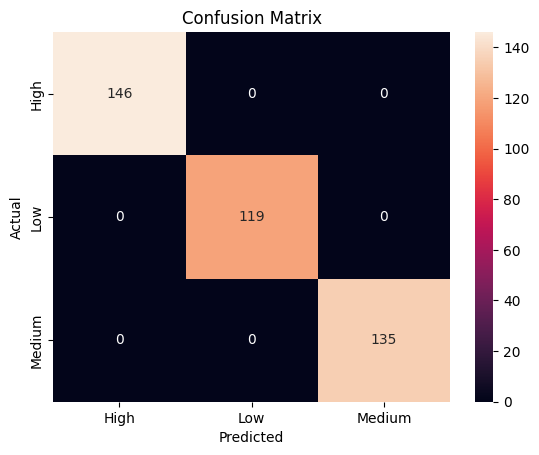

In [3]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generating a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a KNN classifier
k = 5  # Number of neighbors
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

# Plotting decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plotting the decision boundary
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotting training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification (k = %i)" % k)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

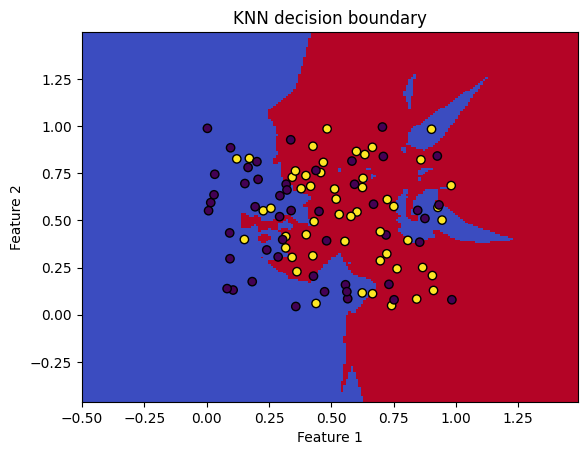

In [8]:
# prompt: plot knn with python

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Generate some data
np.random.seed(123)  # for reproducibility
data = np.random.rand(100, 2)
target = np.random.randint(0, 2, size=100)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, target)

# Create a meshgrid for plotting
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap="coolwarm")

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=target, edgecolors="k", cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN decision boundary")
plt.show()
